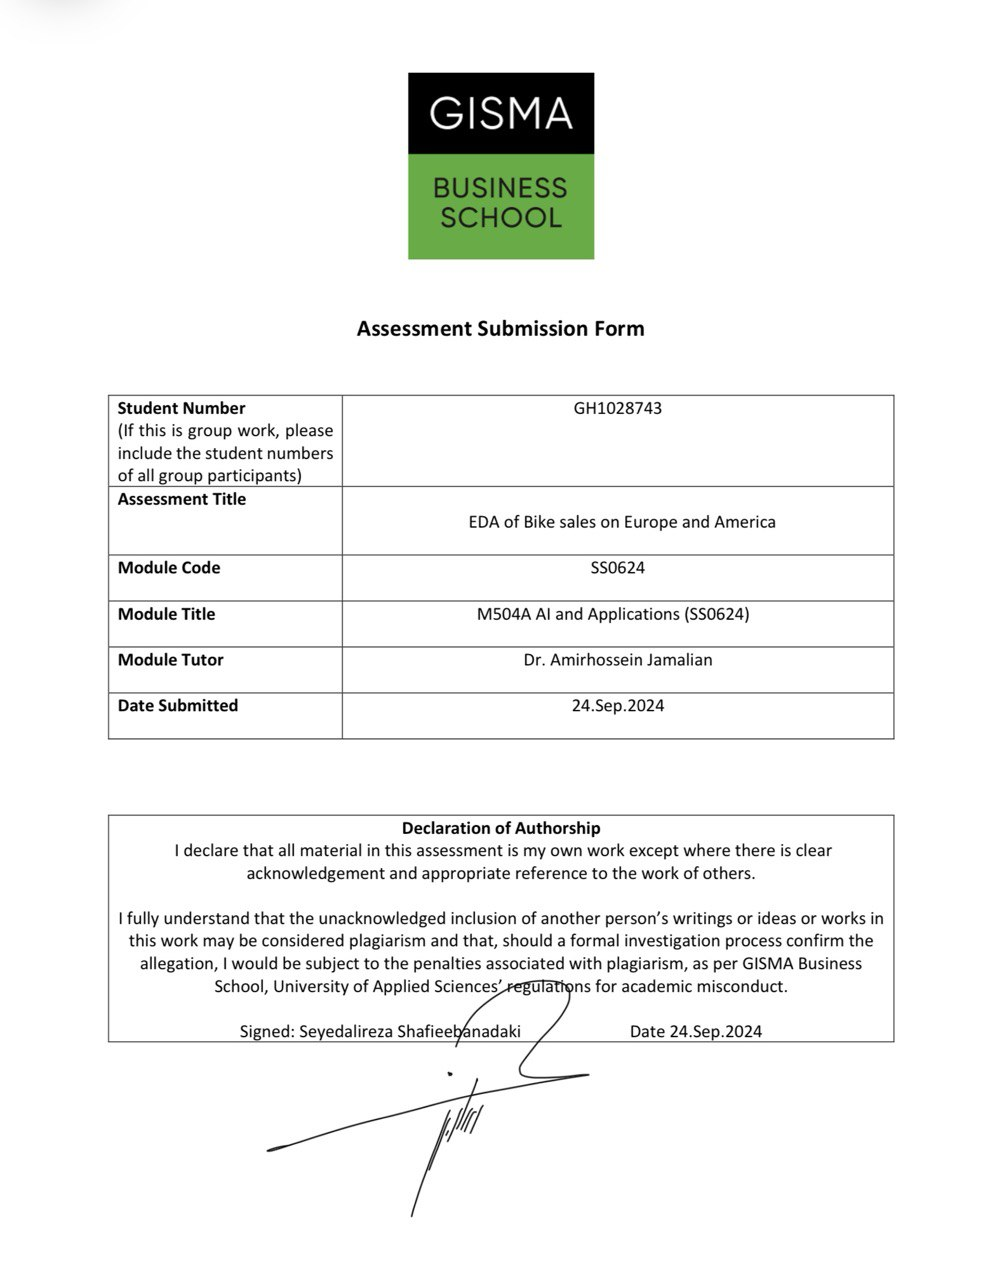

#                                  Exploratory Data Analysis of Bike Sales in Europe and America
### Name:Seyedalireza Shafieebanadaki , Student Id: GH1028743

###### <img src="attachment:341a63eb-c938-44d4-b5db-8c041c2dcf90.png" width="500"/>#       <img src="attachment:dce542c7-4868-4adc-bf5f-13f6b92b71f1.png" width="500"/>




# 1)Business Context

Our client is a leading bicycle retailer operating in Europe and America.

They have a comprehensive data set that includes bike sales information. These data are encompassed demographic details such as age, groups gender and geographical locations.

The client asks to leverage this data to enhance their decision making process and optimize pricing strategies.

As a data scientist consultant my role is to perform an exploratory data analysis to find out some insights and trends from the data which help the company to facilitate their strategic decision making process.


# 3)Objective


1-clean and explore the data to answer the business questions, which were invoked by the client.

2-The purpose of this EDA is to find insights that will ultimately help in further explorations such as cleaning / preparing / transforming the data that could be used in machine learning algorithm for this client


# 4) Data source
The data set is from the public source of Kaggle.com and the link to datasource is:

                               https://www.kaggle.com/datasets/prepinstaprime/europe-bike-store-sales







# 4)Business questions to answer after EDA at a glance

1-If we plan to increase our production. what is the best product we should focus on? why?

2-If we plan to run marketing campaings,to push the sales, for which products should we run our camgpains?

3- Regarding the above marketing camgpains (Question 2), for which customer segement and for which country our campaign should be run?

4- If we want to run some marketing campaigns to push the sales, what is the best time in year to do so?

5- Which countries are contributing the most and least to our revenue?

6- Which months in a year should we increase our inventory level? how is our seasonaliy trend in year and for which group of products?

7- We plan to increase our branding image. for which market segment should we focus on? should we consider cultrual difference?

8- If we plan to redesign the supplychain for our branches. What are the products that should always be in stock in the respective country?

9- We have seen some revenue stream fluctuatuins in past years. what was the reason for this fluctuation in Revenue ?


# 5) How this notebook is organized based on assesment criteria ?

As Required by the assesment criteria,I will put each respective business question before the designated code-box during the execution of my noteboook, and discuss the result immideatly below the result of the code !


During our code the above business questions are adressed by the Abbreviation of "BQ #" AND the respective answer is adressed by "BA #". (#) refers to the number of business question.

# Data Exploration and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_org= pd.read_csv('Sales 2.csv')
df_org.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

In [ ]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

Our data consists of  17 total features mostly demographic. both categorical and numerical are among our datatypes.

In [ ]:
df_org.describe().T

count         mean          std     min     25%     50%  \
Day             113036.0    15.665753     8.781567     1.0     8.0    16.0   
Year            113036.0  2014.401739     1.272510  2011.0  2013.0  2014.0   
Customer_Age    113036.0    35.919212    11.021936    17.0    28.0    35.0   
Order_Quantity  113036.0    11.901660     9.561857     1.0     2.0    10.0   
Unit_Cost       113036.0   267.296366   549.835483     1.0     2.0     9.0   
Unit_Price      113036.0   452.938427   922.071219     2.0     5.0    24.0   
Profit          113036.0   285.051665   453.887443   -30.0    29.0   101.0   
Cost            113036.0   469.318695   884.866118     1.0    28.0   108.0   
Revenue         113036.0   754.370360  1309.094674     2.0    63.0   223.0   

                   75%      max  
Day               23.0     31.0  
Year            2016.0   2016.0  
Customer_Age      43.0     87.0  
Order_Quantity    20.0     32.0  
Unit_Cost         42.0   2171.0  
Unit_Price        70.0   3578.0  
Profit           358.0  15096.0  
Cost             432.0  42978.0  
Revenue          800.0  58074.0

Here we can get good insight about our numerical data statistics. for example we can find out that the customer are average og 35 years old and each customer has ordered average 11 products.

In [ ]:
df_org.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

# since we do not have missing value, we generate and handle them as required in class !

In [ ]:
df=df_org.copy()
print ("before injecting NaN:")
display (df.isna().sum())
print()

for _ in range(1000):
    i=np.random.randint(0, df.shape[0])
    j=np.random.randint(0,df.shape[1])
    df.iloc[i,j]= None
print("after injecting NaN:")
display(df.isna().sum())

df.to_csv("data_with_NaN.csn", index=False)

before injecting NaN:


Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


after injecting NaN:


Date                58
Day                 60
Month               50
Year                74
Customer_Age        58
Age_Group           55
Customer_Gender     60
Country             49
State               66
Product_Category    48
Sub_Category        39
Product             51
Order_Quantity      49
Unit_Cost           58
Unit_Price          51
Profit              48
Cost                65
Revenue             60
dtype: int64

In [ ]:
df['Age_Group'].fillna(df['Age_Group'].mode()[0], inplace=True)
df['Customer_Gender'].fillna(df['Customer_Gender'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)
df['Sub_Category'].fillna(df['Sub_Category'].mode()[0], inplace=True)
df['Product'].fillna(df['Product'].mode()[0], inplace=True)

In [ ]:
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Order_Quantity'].fillna(df['Order_Quantity'].median(), inplace=True)
df['Unit_Cost'].fillna(df['Unit_Cost'].median(), inplace=True)
df['Unit_Price'].fillna(df['Unit_Price'].median(), inplace=True)
df['Profit'].fillna(df['Profit'].median(), inplace=True)
df['Cost'].fillna(df['Cost'].median(), inplace=True)
df['Revenue'].fillna(df['Revenue'].median(), inplace=True)

In [ ]:
df_org.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

We have treated the NAN values with various techniques like susbtituting whit Median ( for numerical data) and Mode( mostly for categorical data).

We have chosen the average method, because the distribustion of numerical data is very close to normal distribution.

In [ ]:
# how much record and features do we have?
df.shape

(113036, 18)

We should handle the duplicate values in our dataset. so first we see if we have any? the we consider removing !

In [ ]:
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

978

In [ ]:
df = df.drop_duplicates()
df.shape

(112048, 18)

In [ ]:
df.duplicated().values.any()

False

From the above it is clear that:

* There are **no missing values in the dataset of 113k records** but we have generated and handeled this missing values.
**there are 988 duplicate records** that need to be **removed** as they may affect for further analysis
* There are a total of **18 features** out of **7 are numerical** and the rest are categorical features.

In [ ]:
df.head(5)

Date   Day     Month    Year  Customer_Age       Age_Group  \
0  2013-11-26  26.0  November  2013.0          19.0     Youth (<25)   
1  2015-11-26  26.0  November  2015.0          19.0     Youth (<25)   
2  2014-03-23  23.0     March  2014.0          49.0  Adults (35-64)   
3  2016-03-23  23.0     March  2016.0          49.0  Adults (35-64)   
4  2014-05-15  15.0       May  2014.0          47.0  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  \
0  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
1  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
2  Hitch Rack - 4-Bike            23.0       45.0       120.0  1366.0  1035.0   
3  Hitch Rack - 4-Bike            20.0       45.0       120.0  1188.0   900.0   
4  Hitch Rack - 4-Bike             4.0       45.0       120.0   238.0   180.0   

   Revenue  
0    950.0  
1    950.0  
2   2401.0  
3   2088.0  
4    418.0

There are miss calculation of **Profit, Cost and Revenue** features from the data. As we can see from the first record the Order Quantity of Hitch Rack - 4-Bike is **8 unit** and each unit price is **120**, but the total revenue is **950** instead of **960**. Since there are miss calculation from Revenue the Profit feature is affected. As data analyst we need to aware with the data and do feature engineering if needed.

In [ ]:
del_features = ['Day','Profit','Cost','Revenue']
df.drop(del_features, axis=1, inplace=True)

Similar features which convey the same information should be avoided. In this dataset, **Date,Day,Month and Year** essentially convey the same information. So we will drop **Day** feature and having lesser unique values to prevent losing any information. We drop Day Feature since we will not daily analytics on the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112048 entries, 0 to 113035
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              111980 non-null  object 
 1   Month             112003 non-null  object 
 2   Year              111983 non-null  float64
 3   Customer_Age      112048 non-null  float64
 4   Age_Group         112048 non-null  object 
 5   Customer_Gender   112048 non-null  object 
 6   Country           112048 non-null  object 
 7   State             112048 non-null  object 
 8   Product_Category  112048 non-null  object 
 9   Sub_Category      112048 non-null  object 
 10  Product           112048 non-null  object 
 11  Order_Quantity    112048 non-null  float64
 12  Unit_Cost         112048 non-null  float64
 13  Unit_Price        112048 non-null  float64
dtypes: float64(5), object(9)
memory usage: 12.8+ MB


In [ ]:
df['Total_Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Revenue'] = df['Order_Quantity'] * df['Unit_Price']
df['Profit'] = df['Revenue'] - df['Total_Cost']
df.head(5)

Date     Month    Year  Customer_Age       Age_Group Customer_Gender  \
0  2013-11-26  November  2013.0          19.0     Youth (<25)               M   
1  2015-11-26  November  2015.0          19.0     Youth (<25)               M   
2  2014-03-23     March  2014.0          49.0  Adults (35-64)               M   
3  2016-03-23     March  2016.0          49.0  Adults (35-64)               M   
4  2014-05-15       May  2014.0          47.0  Adults (35-64)               F   

     Country             State Product_Category Sub_Category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Total_Cost  \
0  Hitch Rack - 4-Bike             8.0       45.0       120.0       360.0   
1  Hitch Rack - 4-Bike             8.0       45.0       120.0       360.0   
2  Hitch Rack - 4-Bike            23.0       45.0       120.0      1035.0   
3  Hitch Rack - 4-Bike            20.0       45.0       120.0       900.0   
4  Hitch Rack - 4-Bike             4.0       45.0       120.0       180.0   

   Revenue  Profit  
0    960.0   600.0  
1    960.0   600.0  
2   2760.0  1725.0  
3   2400.0  1500.0  
4    480.0   300.0

**Total_Cost feature** created by **multiplying Order_Quanity and Unit_Cost features.** **Revenue feature** created by **multiplying Order_Quantity and Unit_Price features.** And the last for **Profit feature** is created by **subtracting Revenue feature with Total_Cost feature.**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112048 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              111980 non-null  datetime64[ns]
 1   Month             112003 non-null  object        
 2   Year              111983 non-null  float64       
 3   Customer_Age      112048 non-null  float64       
 4   Age_Group         112048 non-null  object        
 5   Customer_Gender   112048 non-null  object        
 6   Country           112048 non-null  object        
 7   State             112048 non-null  object        
 8   Product_Category  112048 non-null  object        
 9   Sub_Category      112048 non-null  object        
 10  Product           112048 non-null  object        
 11  Order_Quantity    112048 non-null  float64       
 12  Unit_Cost         112048 non-null  float64       
 13  Unit_Price        112048 non-null  float64       
 14  Total_Cos

The datatype Date Feature cast to datetime since Date Feature represents datetime

In [ ]:
df.head(5)

Date     Month    Year  Customer_Age       Age_Group Customer_Gender  \
0 2013-11-26  November  2013.0          19.0     Youth (<25)               M   
1 2015-11-26  November  2015.0          19.0     Youth (<25)               M   
2 2014-03-23     March  2014.0          49.0  Adults (35-64)               M   
3 2016-03-23     March  2016.0          49.0  Adults (35-64)               M   
4 2014-05-15       May  2014.0          47.0  Adults (35-64)               F   

     Country             State Product_Category Sub_Category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Total_Cost  \
0  Hitch Rack - 4-Bike             8.0       45.0       120.0       360.0   
1  Hitch Rack - 4-Bike             8.0       45.0       120.0       360.0   
2  Hitch Rack - 4-Bike            23.0       45.0       120.0      1035.0   
3  Hitch Rack - 4-Bike            20.0       45.0       120.0       900.0   
4  Hitch Rack - 4-Bike             4.0       45.0       120.0       180.0   

   Revenue  Profit  
0    960.0   600.0  
1    960.0   600.0  
2   2760.0  1725.0  
3   2400.0  1500.0  
4    480.0   300.0

In [ ]:
df.nunique()

Date                1884
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Total_Cost           371
Revenue              445
Profit               454
dtype: int64

We need to identify unique value of each features especially the categorial features. Identify unique values of categorical features so that they can be used for further exploration

# Exploratory Data Analysis
## Corelation analysis

In [ ]:
# lets device and analyse the numerical data in a seperate dataframe
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Year  Customer_Age  Order_Quantity  Unit_Cost  Unit_Price  Total_Cost  \
0  2013.0          19.0             8.0       45.0       120.0       360.0   
1  2015.0          19.0             8.0       45.0       120.0       360.0   
2  2014.0          49.0            23.0       45.0       120.0      1035.0   
3  2016.0          49.0            20.0       45.0       120.0       900.0   
4  2014.0          47.0             4.0       45.0       120.0       180.0   

   Revenue  Profit  
0    960.0   600.0  
1    960.0   600.0  
2   2760.0  1725.0  
3   2400.0  1500.0  
4    480.0   300.0

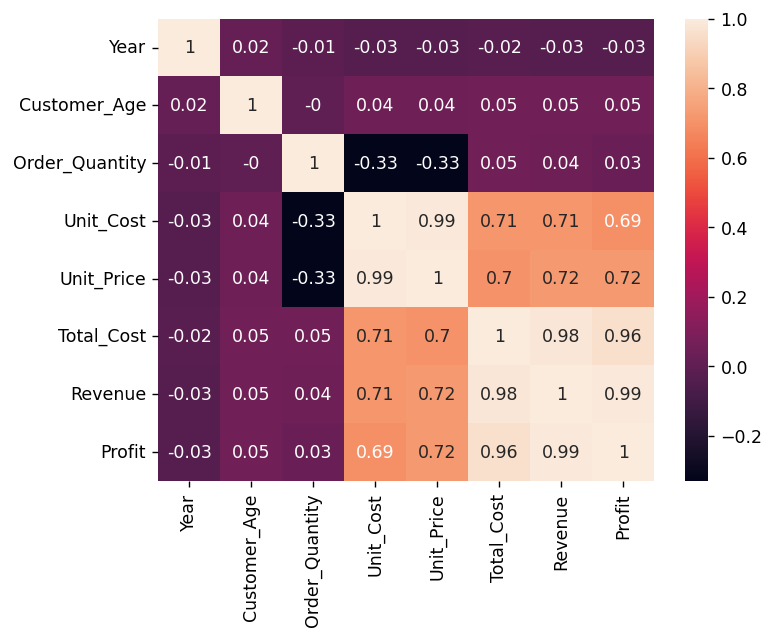

In [ ]:
plt.figure(dpi=125)
sns.heatmap(np.round(df_num.corr(),2),annot=True)
plt.show()

We can see that Unit_Cost, Unit_Price, Total_Cost, Revenue and Profit are highly correlated to each other since that the features are made by each other feature

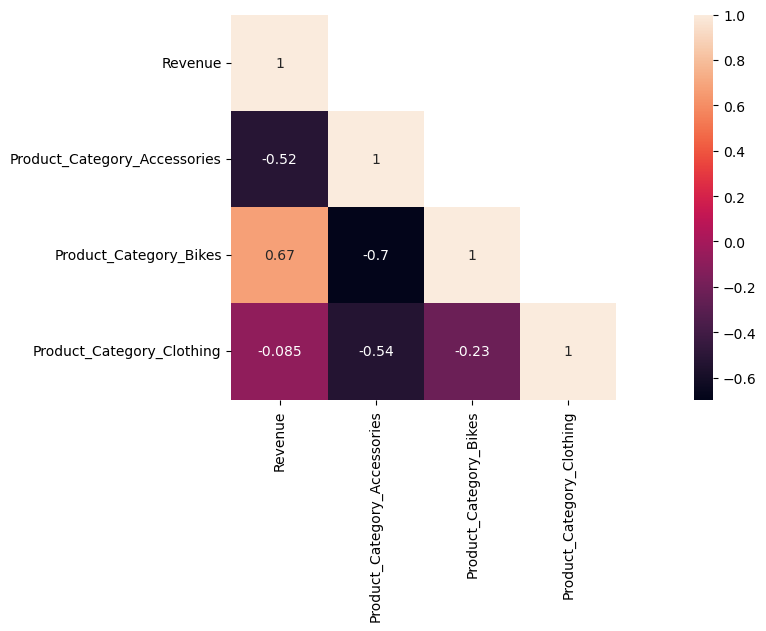

In [ ]:
df2 = df[['Product_Category','Revenue']]
df_cat = pd.get_dummies(df2)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

We can see that Bikes Product Category have high correlation with the revenue of the organization

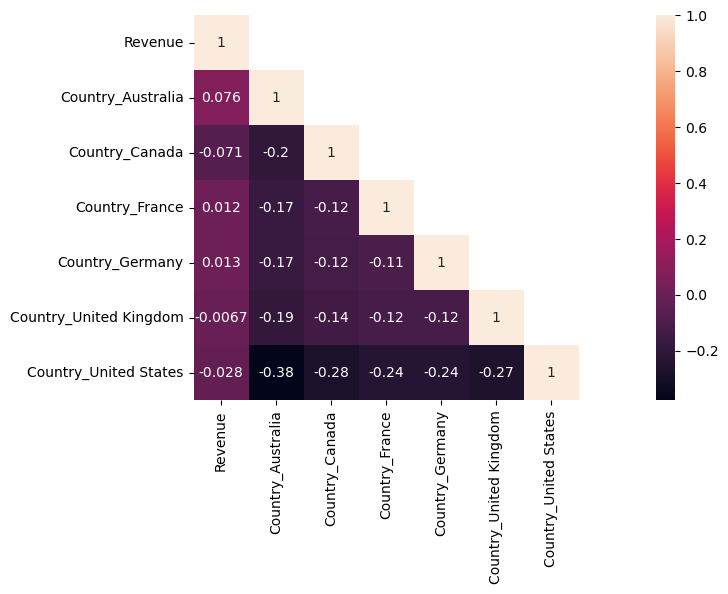

In [ ]:
df3 = df[['Country','Revenue']]
df_cat = pd.get_dummies(df3)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

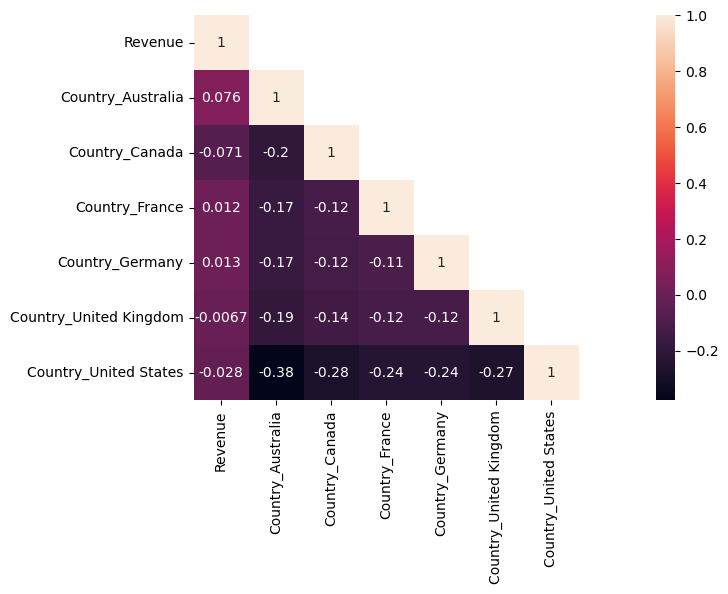

In [ ]:
df3 = df[['Country','Revenue']]
df_cat = pd.get_dummies(df3)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

We can see that Country doesn't have high correlation with the revenue of the organization

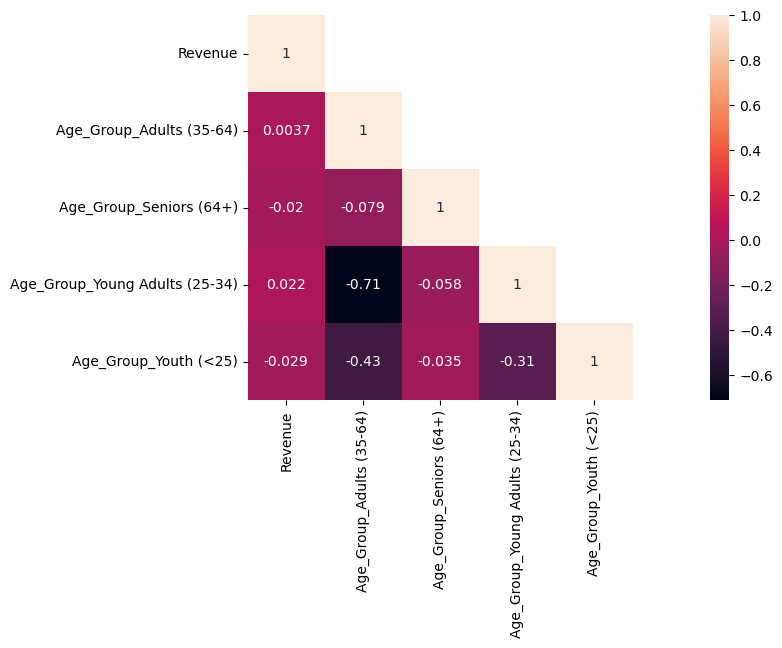

In [ ]:
df4 = df[['Age_Group','Revenue']]
df_cat = pd.get_dummies(df4)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

We can see that Age Group doesn't have high correlation with the revenue of the organization

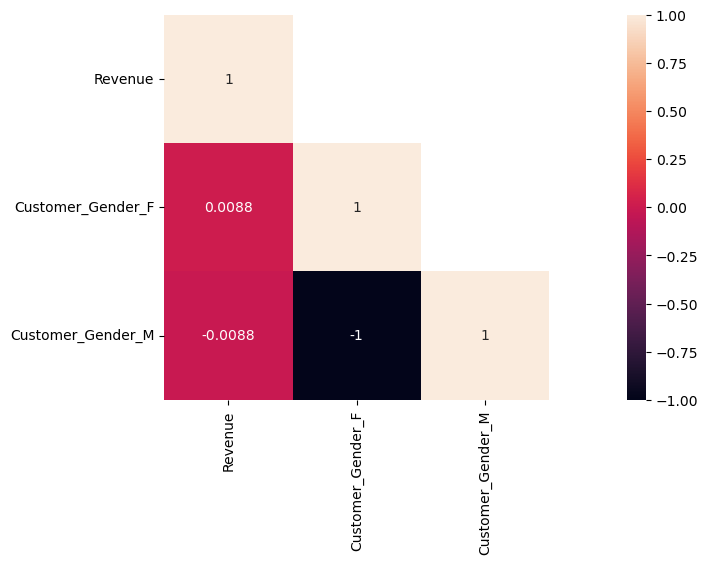

In [ ]:
df5 = df[['Customer_Gender','Revenue']]
df_cat = pd.get_dummies(df5)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

We can see that gender doesn't have high correlation with the revenue of the organization

<Figure size 1000x1000 with 0 Axes>

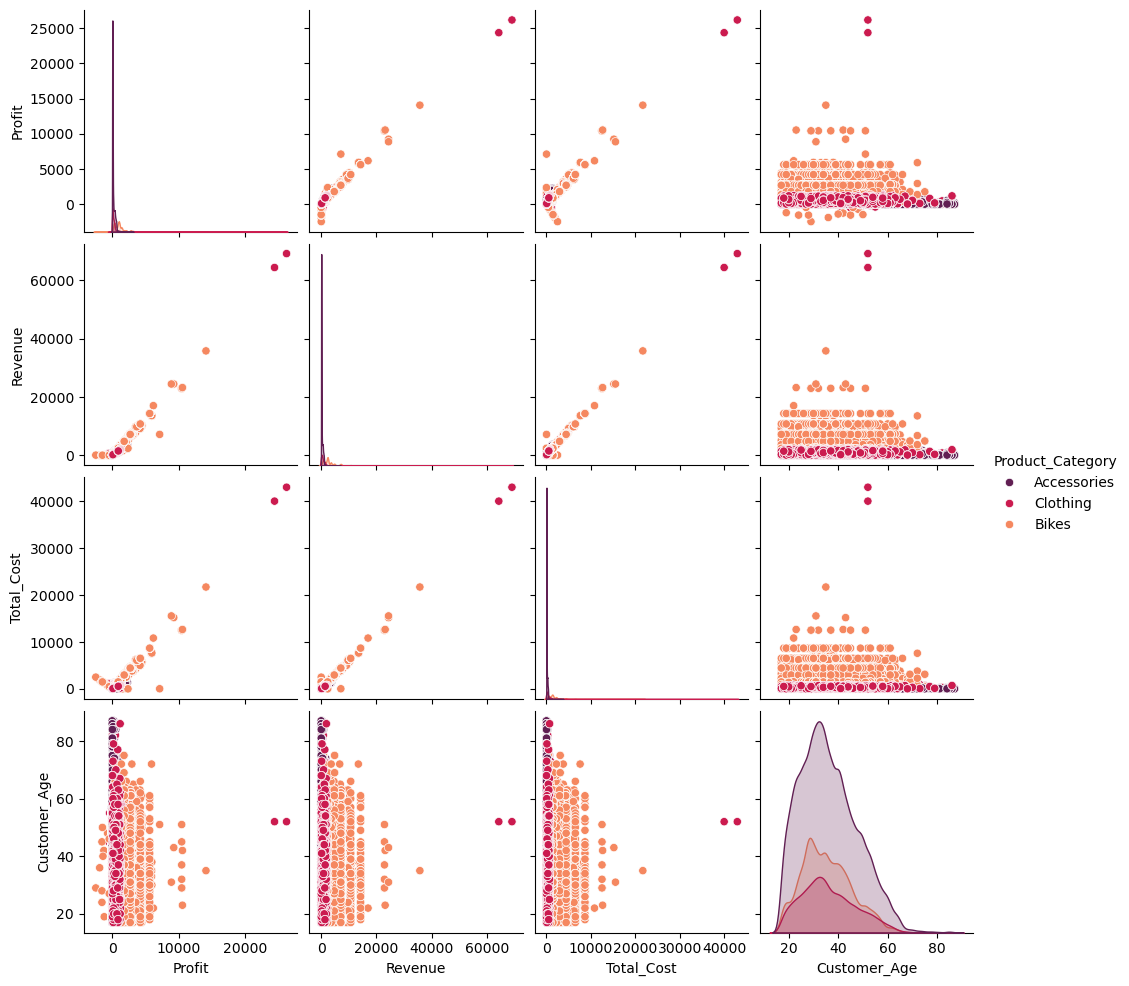

In [ ]:
columns_to_plot = ['Product_Category', 'Profit', 'Revenue','Total_Cost', 'Customer_Age']
plt.figure(figsize=(10,10))
sns.pairplot(df[columns_to_plot], hue='Product_Category',palette=('rocket'))
plt.show()

From scatterplot above we can see that:
1. Profit Revenue and Total Cost of Product Category is highly corelated and it is obvious since that those features are calculated within each other
2. There are some outliers value with Clothing product.  
3. Bikes category provides the most for revenue and profit and total cost
4. Most transactions are obtained by customers with age period 20 to 50 to buy accesories product category

# Sales insight

/var/folders/j6/43wsg1xs7dd0phzyyfb12bvc0000gn/T/ipykernel_4786/2595900654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Month'],palette='rocket',order = month_order)


Text(0.5, 1.0, 'Monthly Cumulative Transaction')

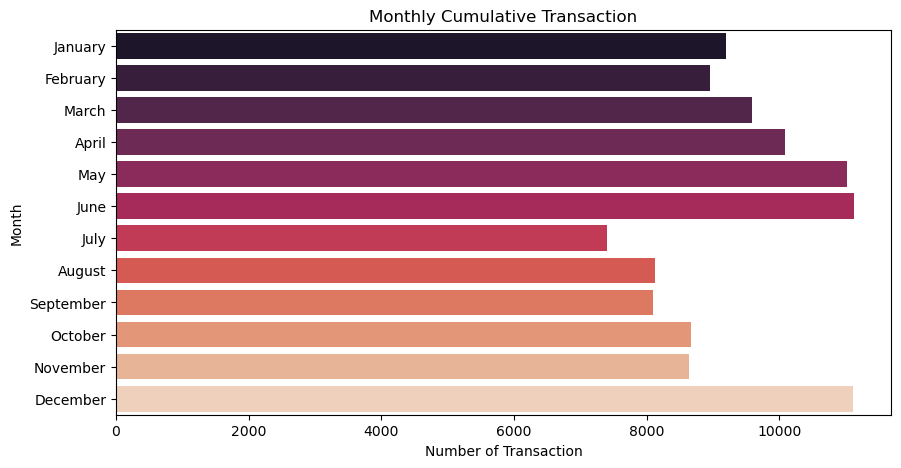

In [ ]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(df['Month'],palette='rocket',order = month_order)
plt.xlabel('Number of Transaction')
plt.ylabel('Month')
plt.title('Monthly Cumulative Transaction')

June and December are the most high season months since 2011 to 2016 and it might be correlated with holiday season.

/var/folders/j6/43wsg1xs7dd0phzyyfb12bvc0000gn/T/ipykernel_4786/3664624682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Country'],palette='rocket',order = df['Country'].value_counts().index)


Text(0.5, 1.0, 'Country Transaction')

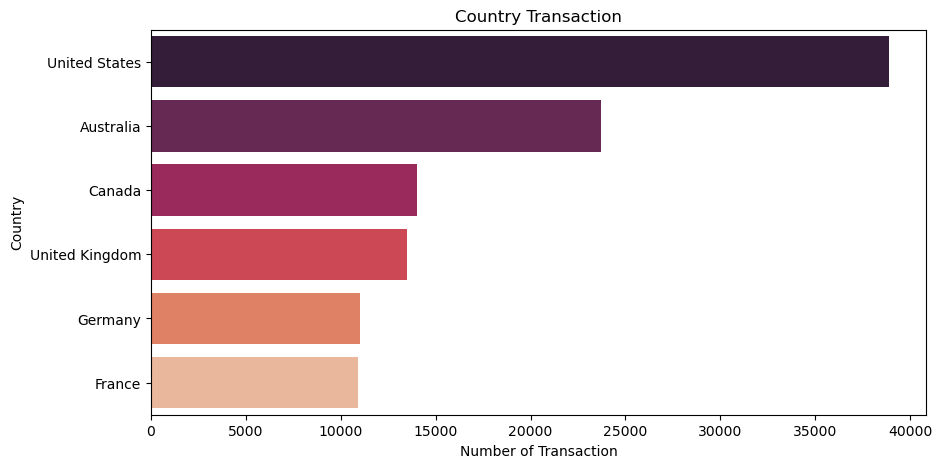

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(df['Country'],palette='rocket',order = df['Country'].value_counts().index)
plt.xlabel('Number of Transaction')
plt.ylabel('Country')
plt.title('Country Transaction')

United States is the most transaction come from and followed by Australia

# BQ9: We have seen some revenue stream fluctuatuins in past years. what was the reason for this fluctuation in Revenue ?

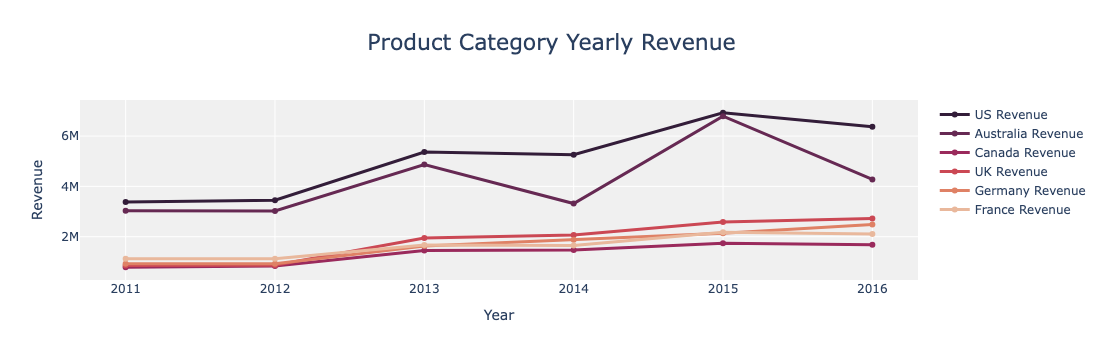

In [ ]:
UsRev = df[df['Country'] == 'United States'].groupby('Year')['Revenue'].sum().reset_index()
AusRev = df[df['Country'] == 'Australia'].groupby('Year')['Revenue'].sum().reset_index()
CanRev = df[df['Country'] == 'Canada'].groupby('Year')['Revenue'].sum().reset_index()
UKRev = df[df['Country'] == 'United Kingdom'].groupby('Year')['Revenue'].sum().reset_index()
GerRev = df[df['Country'] == 'Germany'].groupby('Year')['Revenue'].sum().reset_index()
FrRev = df[df['Country'] == 'France'].groupby('Year')['Revenue'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=UsRev['Year'], y=UsRev['Revenue'],name="US Revenue",hovertext=UsRev['Revenue'],line_color="#331D39"))
fig.add_trace(go.Scatter(x=AusRev['Year'], y=AusRev['Revenue'],name="Australia Revenue",hovertext=AusRev['Revenue'],line_color="#662953"))
fig.add_trace(go.Scatter(x=CanRev['Year'], y=CanRev['Revenue'],name="Canada Revenue",hovertext=CanRev['Revenue'],line_color="#9A2A5C"))
fig.add_trace(go.Scatter(x=UKRev['Year'], y=UKRev['Revenue'],name="UK Revenue",hovertext=UKRev['Revenue'],line_color="#CB4854"))
fig.add_trace(go.Scatter(x=GerRev['Year'], y=GerRev['Revenue'],name="Germany Revenue",hovertext=GerRev['Revenue'],line_color="#DF8165"))
fig.add_trace(go.Scatter(x=FrRev['Year'], y=FrRev['Revenue'],name="France Revenue",hovertext=FrRev['Revenue'],line_color="#E9B89C"))
fig.update_layout(title_text='Product Category Yearly Revenue',title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis_title="Year",yaxis_title="Revenue")
fig.update_traces(line_width=3, selector=dict(type='scatter'))
fig.update_layout(plot_bgcolor='#F0F0F0')
fig.show()

# BA9: As we can see from the visualization above :
1. US and Australia are the most contributed revenue by country.
2. The revenue is peaked at 2015 even though the most number transaction are made in 2014 and 2016
3. There are some serious declining revenue in Australia in 2015 to 2016
4. since the profit decline is not such rapid as revenue decline, the reason might be the price cutting startegies while keeping the profit margin by cost reduction

# BQ4: If we want to run some marketing campaigns to push the sales, what is the best time in year to do so?

Text(0.5, 1.0, 'Monthly Cumulative Transaction')

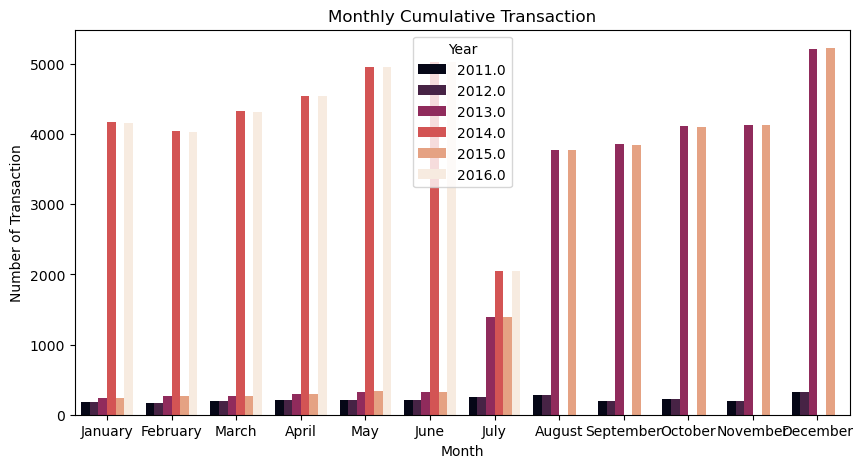

In [ ]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data = df, x='Month', hue='Year', palette='rocket',order = month_order)
plt.xlabel('Month')
plt.ylabel('Number of Transaction')
plt.title('Monthly Cumulative Transaction')

# BA4: As we can see from the visualization above 2014 and 2016 records for August until December are not recorded. Maybe that's why Australia have declining revenue for 2016 because of some records were not recorded. Also we can understand that in july the demand for our products are the least and this pattern exists for every year. so, It is a good idea to go for this campaigns on July of every year !

# BQ6 :Which months in a year should we increase our inventory level? how is our seasonaliy trend in year and for which group of products?

Text(0.5, 1.0, 'Monthly Cumulative Transaction')

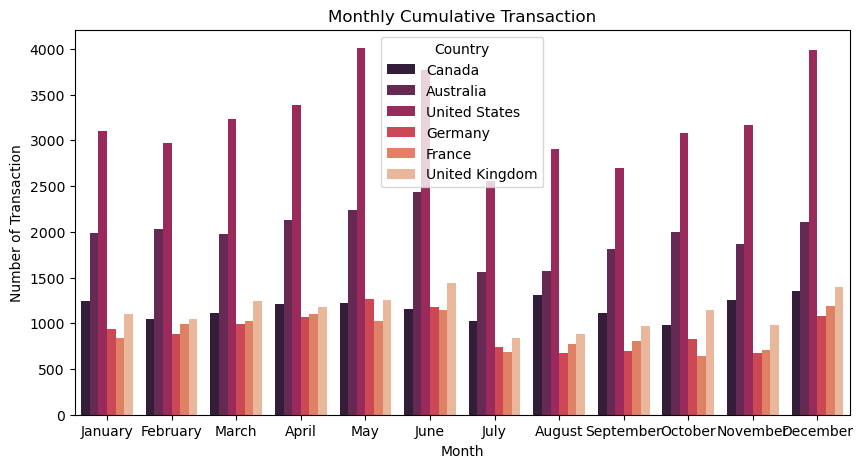

In [ ]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data = df, x='Month', hue='Country', palette='rocket',order = month_order)
plt.xlabel('Month')
plt.ylabel('Number of Transaction')
plt.title('Monthly Cumulative Transaction')

# BA6: June and December are the most high season months since 2011 to 2016 and it might be correlated with holiday season.

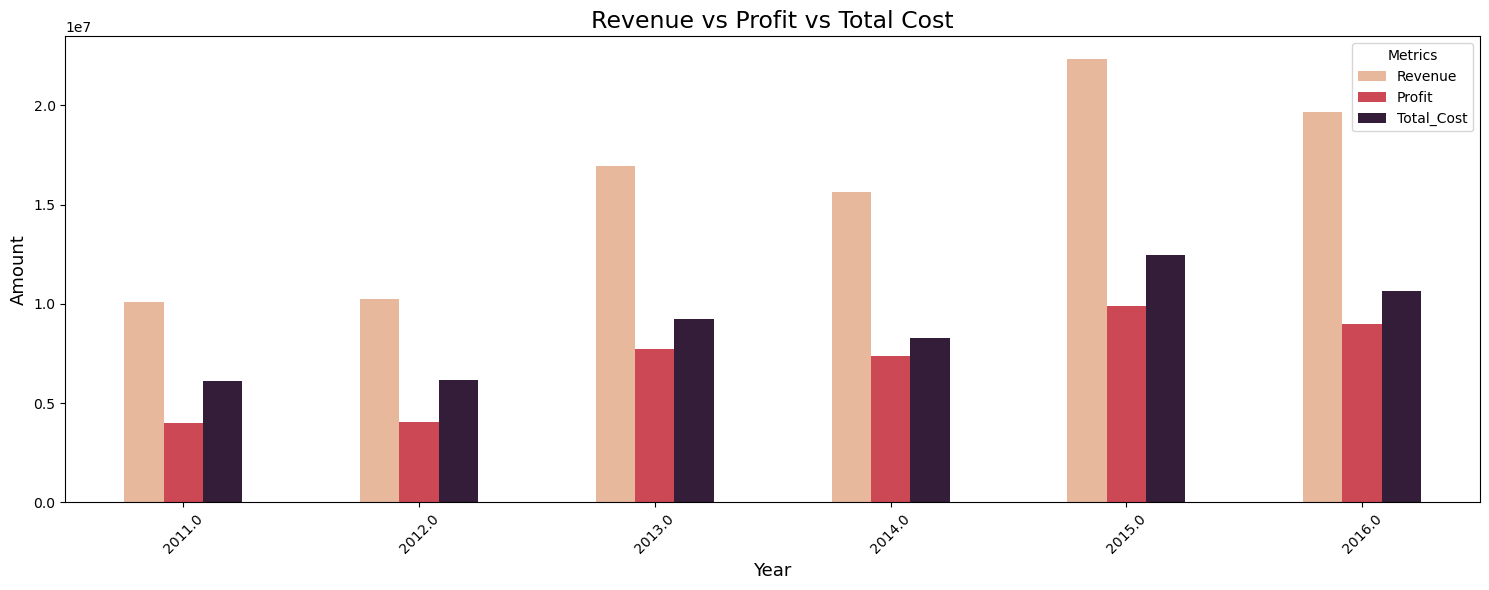

In [ ]:
ax = df.groupby('Year')[['Revenue', 'Profit', 'Total_Cost']].sum().plot(
    kind='bar',
    figsize=(15, 6),
    color=['#E8B89C', '#CB4854', '#331D38']
)

plt.title("Revenue vs Profit vs Total Cost", fontsize=17)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Amount", fontsize=13)  # Add this line for better clarity
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

2015 is the year when the most contributed revenue but also having the most contributed to the cost.

# BQ1 : 1-If we plan to increase our production. what is the best product we should focus on? why?

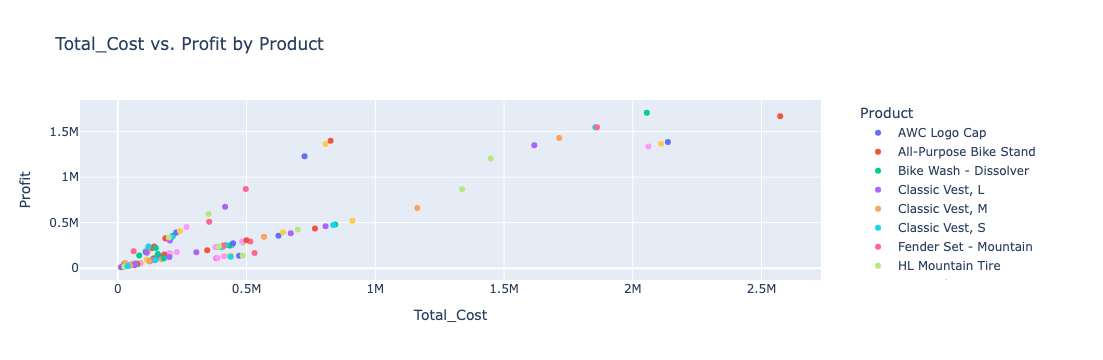

In [ ]:
import pandas as pd
import plotly.express as px

cost_profit_by_product = df.groupby('Product').agg({'Total_Cost': 'sum','Profit': 'sum'}).reset_index()


fig = px.scatter(cost_profit_by_product,x='Total_Cost', y='Profit',color='Product', hover_name='Product',title='Cost vs. Profit by Product',
                 labels={'Total_Cost': 'Total_Cost', 'Profit': 'Profit'})

fig.update_layout(
    xaxis_title='Total_Cost',
    yaxis_title='Profit',
    title='Total_Cost vs. Profit by Product',
    legend_title='Product',
    legend=dict(title='Product', x=1.05, y=1))


fig.show()

# BA1 :the product with least but the most profit should be the best product to invest, here we visuall this trend in our data!

# Fender_set, sport_100 hemlet (blue, black and red) are among these peoducts

Text(0, 0.5, 'Total')

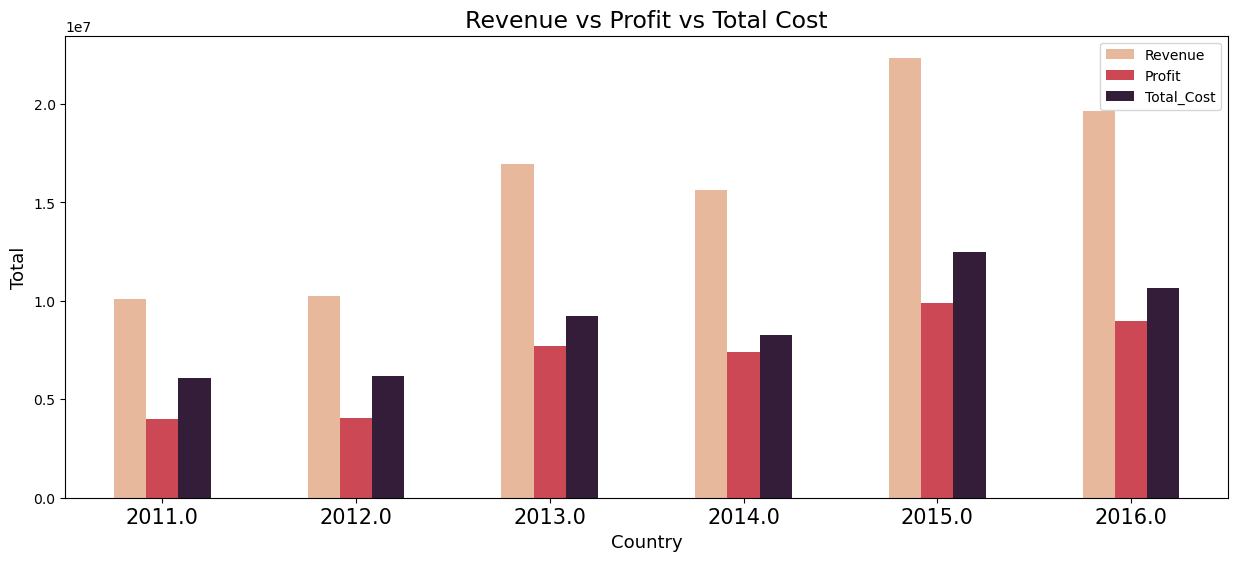

In [ ]:
ax = df.groupby('Year')[['Revenue', 'Profit', 'Total_Cost']].sum().plot( kind='bar',figsize=(15, 6), color=['#E8B89C', '#CB4854', '#331D38'])

plt.title("Revenue vs Profit vs Total Cost",fontsize=17)
plt.xlabel("Country",fontsize=13)
plt.xticks(rotation = 0,fontsize = 15)
plt.ylabel("Total",fontsize=13)

United States is the most contributed revenue country but also having most contributed to the cost and followed by Australia

# BQ2 : If we plan to run marketing campaings,to push the sales, for which products should we run our camgpains?

Text(0, 0.5, 'Total')

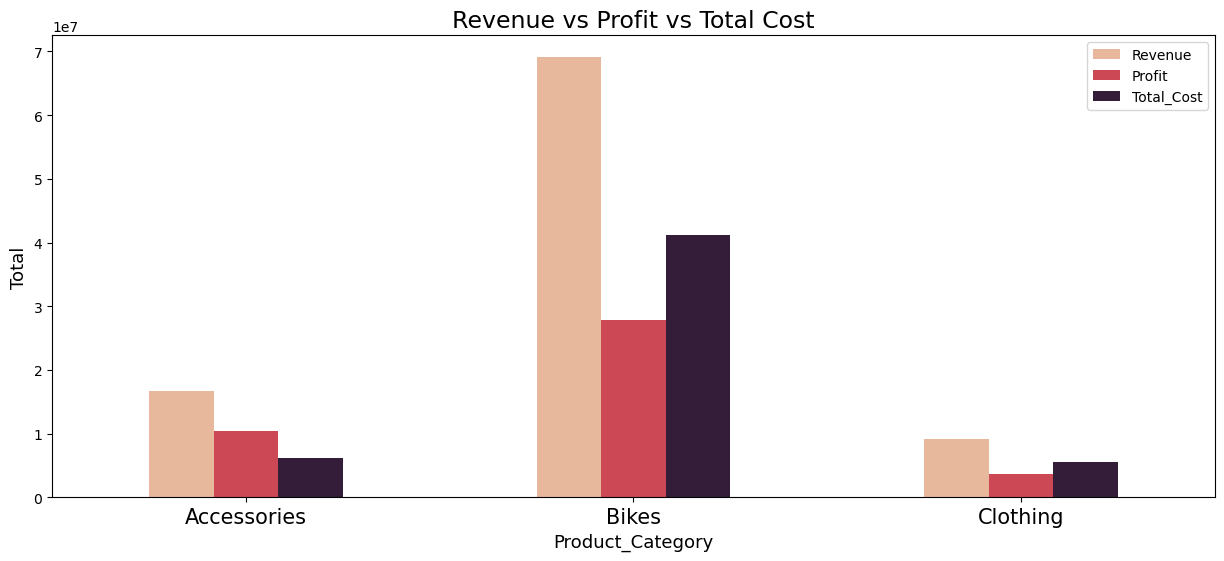

In [ ]:
ax2 = df.groupby('Product_Category')[['Revenue', 'Profit', 'Total_Cost']].sum().plot(kind='bar',figsize=(15, 6), color=['#E8B89C', '#CB4854', '#331D38' ])
plt.title("Revenue vs Profit vs Total Cost",fontsize=17)
plt.xlabel("Product_Category",fontsize=13)
plt.xticks(rotation = 0,fontsize = 15)
plt.ylabel("Total",fontsize=13)

Bikes is the most contributed revenue but also having the most contributed to cost followed by Accesories

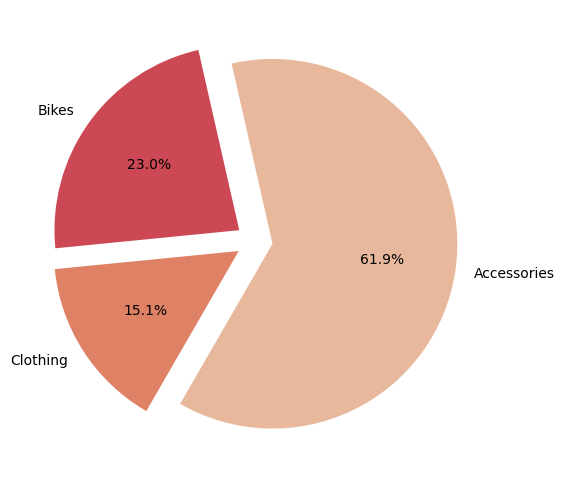

In [ ]:
#category sales
product_cat = df['Product_Category'].value_counts()
label= [product_cat.index.tolist()]
plt.pie(product_cat,labels=label[0],explode=(0.1, 0.1, 0.1), autopct='%1.1f%%', startangle=240, colors=['#E8B89C','#CB4854','#DE8165'])
plt.gcf().set_size_inches(12,6)
plt.show()

Accesories product category is the most number transaction comes from.

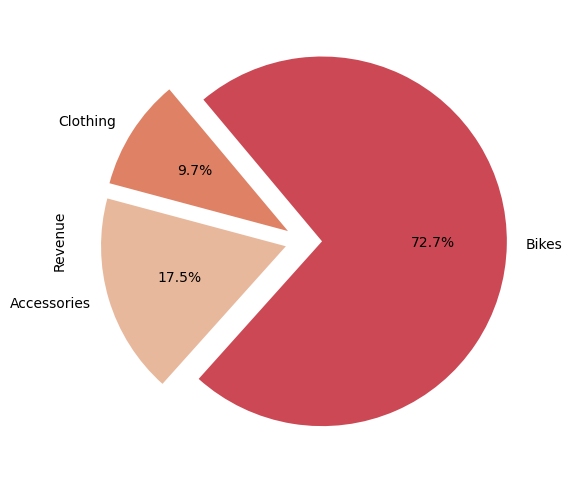

In [ ]:
ax = df.groupby('Product_Category')['Revenue'].sum().plot(kind='pie',figsize=(15, 6),explode=(0.1, 0.1, 0.1),autopct='%1.1f%%',colors=['#E8B89C','#CB4854','#DE8165'],startangle=165)

Bikes is the most contributed product category to the revenue

# BA2 : As we can see from above analysis, the clothing category and the accessories category jave the least contribution to both revenue and profit. because of this reason, we should put some push marketing strategies in order to raise the need or even demand for this category of the products.

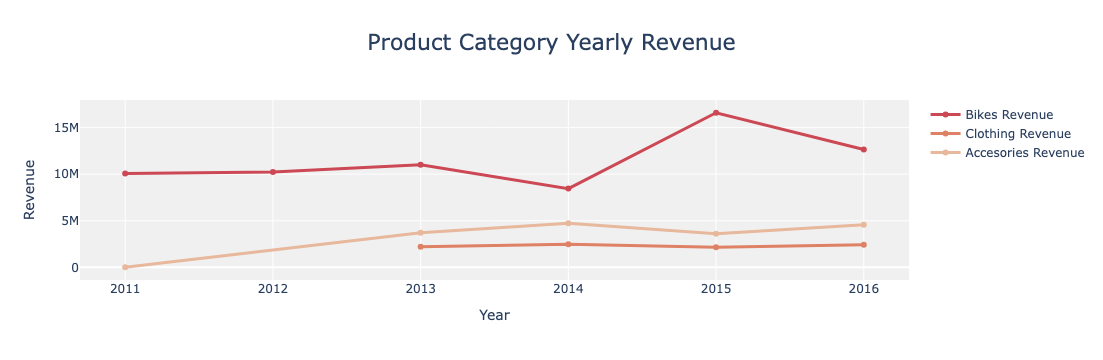

In [ ]:
Bikes = df[df['Product_Category'] == 'Bikes'].groupby('Year')['Revenue'].sum().reset_index()
Clothing = df[df['Product_Category'] == 'Clothing'].groupby('Year')['Revenue'].sum().reset_index()
Accessories = df[df['Product_Category'] == 'Accessories'].groupby('Year')['Revenue'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=Bikes['Year'], y=Bikes['Revenue'],name="Bikes Revenue",hovertext=Bikes['Revenue'],line_color="#CB4854"))
fig.add_trace(go.Scatter(x=Clothing['Year'], y=Clothing['Revenue'],name="Clothing Revenue",hovertext=Clothing['Revenue'],line_color="#DE8165"))
fig.add_trace(go.Scatter(x=Accessories['Year'], y=Accessories['Revenue'],name="Accesories Revenue",hovertext=Accessories['Revenue'],line_color="#E8B89C"))
fig.update_layout(title_text='Product Category Yearly Revenue',title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis_title="Year",yaxis_title="Revenue")
fig.update_traces(line_width=3, selector=dict(type='scatter'))
fig.update_layout(plot_bgcolor='#F0F0F0')
fig.show()

As we can see that bikes having the most revenue come from, but there are missing values for clothing and accesories in 2011 and 2012, in this case maybe that clohting and accesories are new product category to the organization and the sell start at 2013 so that's why there are no record in 2011 and 2012 for clothing and accesories.

# analyse the demographic

Text(0.5, 1.0, 'Country Product Category Transaction')

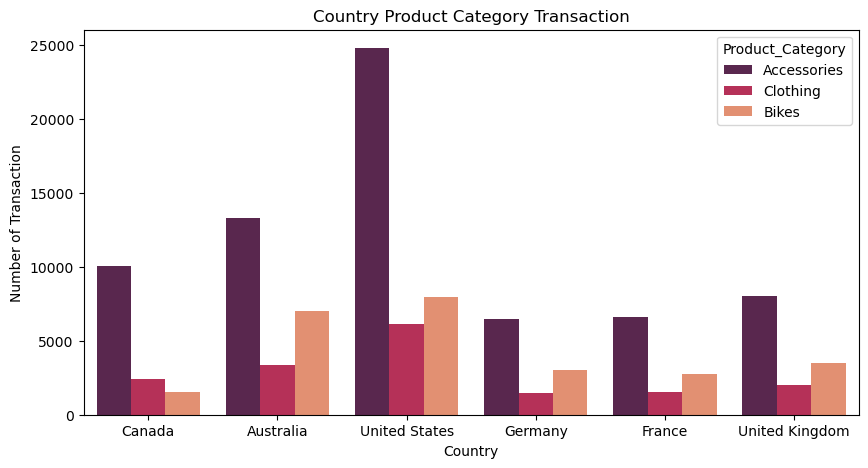

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data=df, x='Country',hue='Product_Category',palette='rocket')
plt.xlabel('Country')
plt.ylabel('Number of Transaction')
plt.title('Country Product Category Transaction')

The transaction of accesories is the most contributed number in all country and followed by bikes except in Canada. Canada is having number transaction of accesories and clothing than bikes.

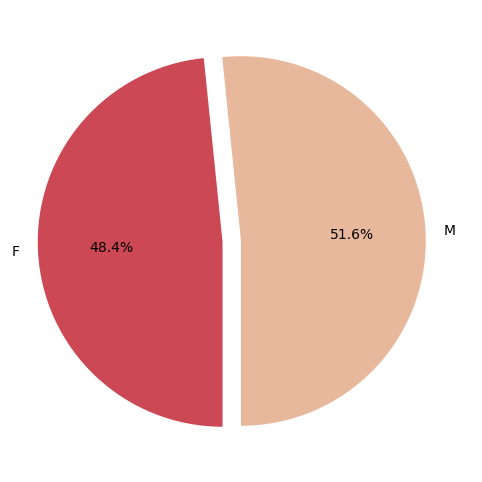

In [ ]:
data_sex = df['Customer_Gender'].value_counts()
label = [data_sex.index.tolist()]
plt.pie(data_sex, labels=label[0], explode=(0.0, 0.1), colors=['#E8B89C','#CB4854'], autopct='%1.1f%%', startangle=270)
plt.gcf().set_size_inches(12,6)
plt.show()

51% Transaction are made by male customers

Text(0.5, 1.0, 'Country Product Category Transaction')

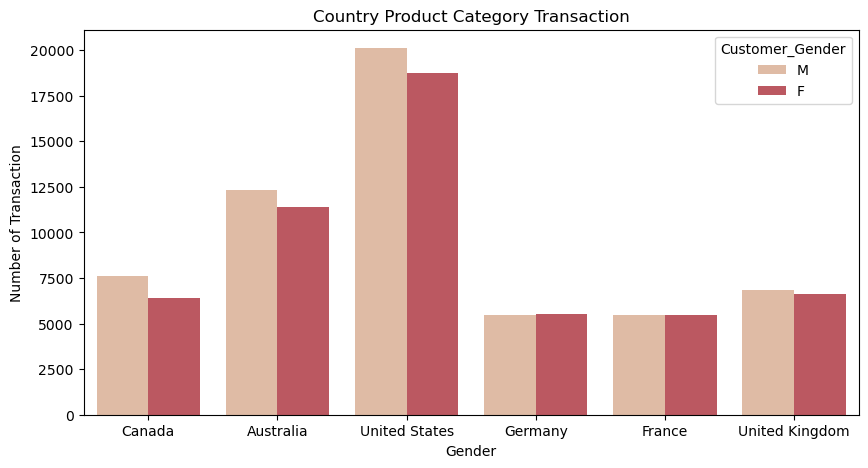

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data=df, x='Country',hue='Customer_Gender',palette=['#E8B89C','#CB4854'])
plt.xlabel('Gender')
plt.ylabel('Number of Transaction')
plt.title('Country Product Category Transaction')

From all 6 country, the most transaction are made by male customers

Text(0.5, 1.0, 'Customer Gender Product Category Transaction')

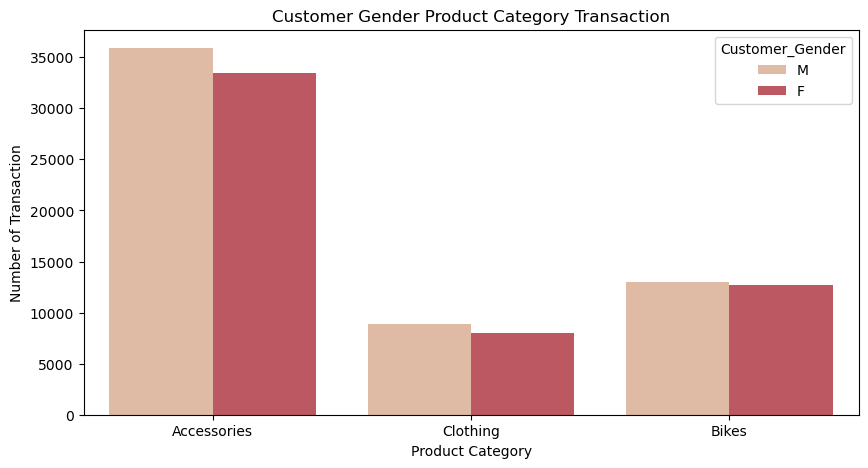

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data=df, x='Product_Category',hue='Customer_Gender',palette=['#E8B89C','#CB4854'])
plt.xlabel('Product Category')
plt.ylabel('Number of Transaction')
plt.title('Customer Gender Product Category Transaction')

# BQ7 :We plan to increase our branding image. for which market segment should we focus on?

Text(0.5, 1.0, 'Age Group Transaction')

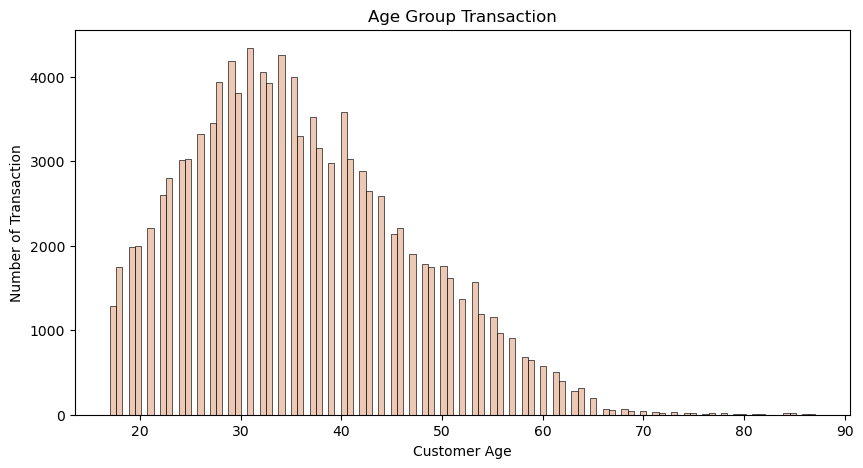

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.histplot(df['Customer_Age'],color='#E8B89C')
plt.xlabel('Customer Age')
plt.ylabel('Number of Transaction')
plt.title('Age Group Transaction')

Most transactions are obtained by customers with age period 20 to 50

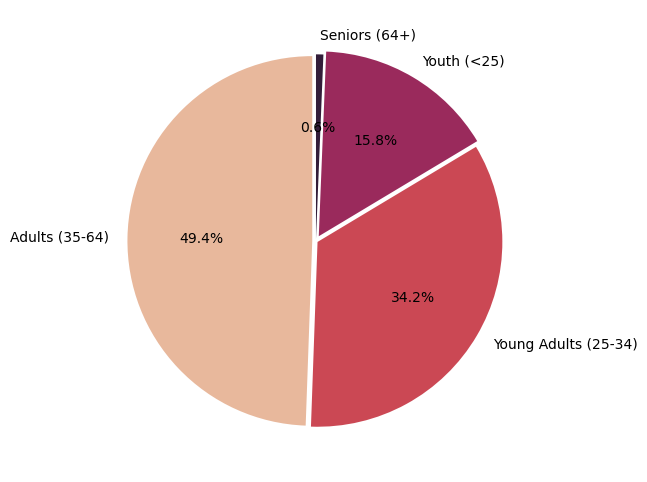

In [ ]:
data_age_group = df['Age_Group'].value_counts()
label = [data_age_group.index.tolist()]
plt.pie(data_age_group, labels=label[0], explode=(0.02, 0.01, 0.03,0.01), colors=['#E8B89C','#CB4854','#9A2A5C','#331D39'], autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

As we can see from the segmentation of customer age that most of customers age are Adults (35-64).

Text(0.5, 1.0, 'Age Group Product Category Transaction')

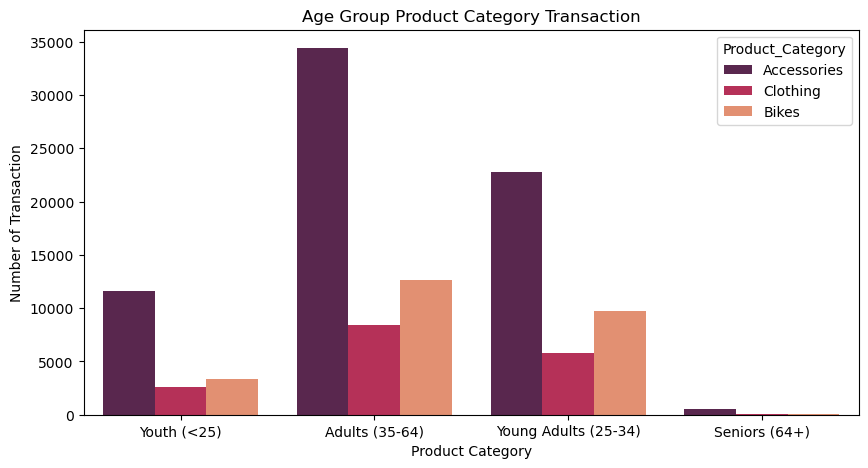

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data=df, x='Age_Group',hue='Product_Category',palette='rocket')
plt.xlabel('Product Category')
plt.ylabel('Number of Transaction')
plt.title('Age Group Product Category Transaction')

Accessories product category is a product category that is widely purchased for all ages

Text(0.5, 1.0, 'Age Group Country Transaction')

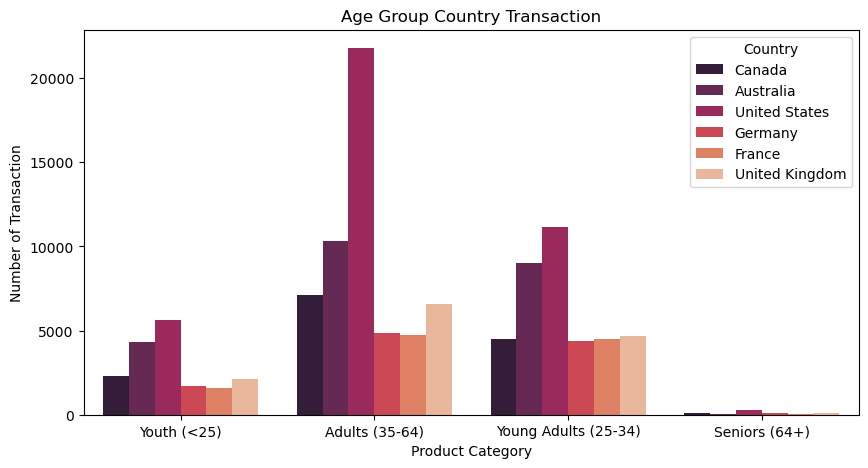

In [ ]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(data=df, x='Age_Group',hue='Country',palette='rocket')
plt.xlabel('Product Category')
plt.ylabel('Number of Transaction')
plt.title('Age Group Country Transaction')

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

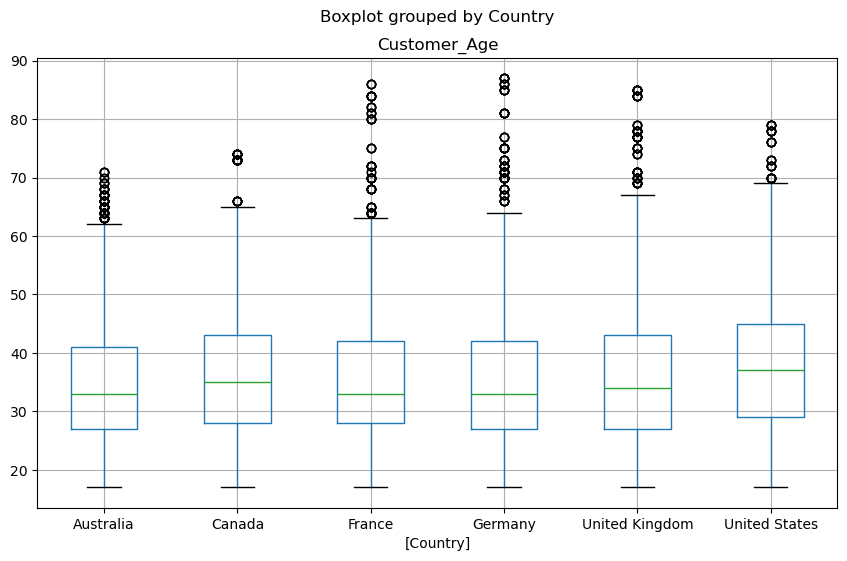

In [ ]:
#Customer age to Country
df[['Customer_Age','Country']].boxplot(by='Country',figsize=(10,6))

United states contribute most of customer in Adults (35-64)

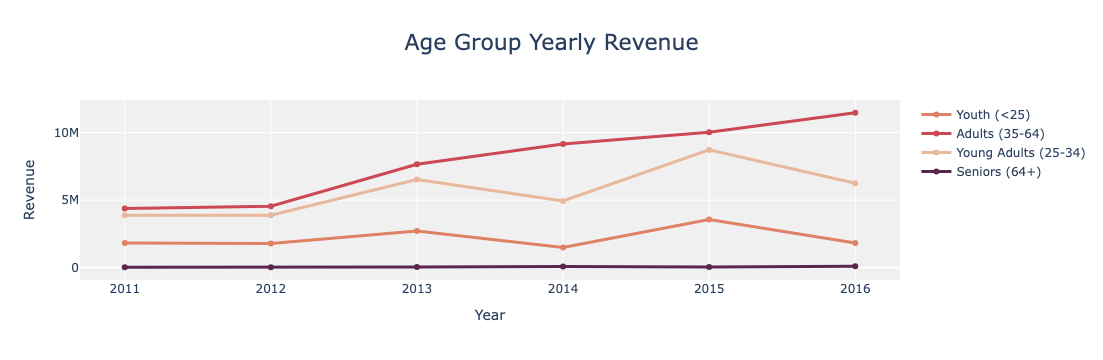

In [ ]:
Youth = df[df['Age_Group'] == 'Youth (<25)'].groupby('Year')['Revenue'].sum().reset_index()
Adults= df[df['Age_Group'] == 'Adults (35-64)'].groupby('Year')['Revenue'].sum().reset_index()
Yadults = df[df['Age_Group'] == 'Young Adults (25-34)'].groupby('Year')['Revenue'].sum().reset_index()
Seniors = df[df['Age_Group'] == 'Seniors (64+)'].groupby('Year')['Revenue'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=Youth['Year'], y=Youth['Revenue'],name="Youth (<25)",hovertext=Youth['Revenue'],line_color="#DE8165"))
fig.add_trace(go.Scatter(x=Adults['Year'], y=Adults['Revenue'],name="Adults (35-64)",hovertext=Adults['Revenue'],line_color="#CB4854"))
fig.add_trace(go.Scatter(x=Yadults['Year'], y=Yadults['Revenue'],name="Young Adults (25-34)",hovertext=Yadults['Revenue'],line_color="#E8B89C"))
fig.add_trace(go.Scatter(x=Seniors['Year'], y=Seniors['Revenue'],name="Seniors (64+)",hovertext=Seniors['Revenue'],line_color="#59274E"))
fig.update_layout(title_text='Age Group Yearly Revenue',title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis_title="Year",yaxis_title="Revenue")
fig.update_traces(line_width=3, selector=dict(type='scatter'))
fig.update_layout(plot_bgcolor='#F0F0F0')
fig.show()

Most of the revenue comes from Adults and increasing in each year, but there are some declining revenue for youth and young adults from 2015 to 2016.  

# BA7: Following above market segmentation by age. we can conclude that our promotional materials which are going to lead the image of our brand should target mostly the adults between 35-50 years old. in this regard the content of our promotionqal material should fit the culture of these target people.

# BQ8 : If we plan to redesign the supplychain for our branches. What are the products that should always be in stock in the respective country?

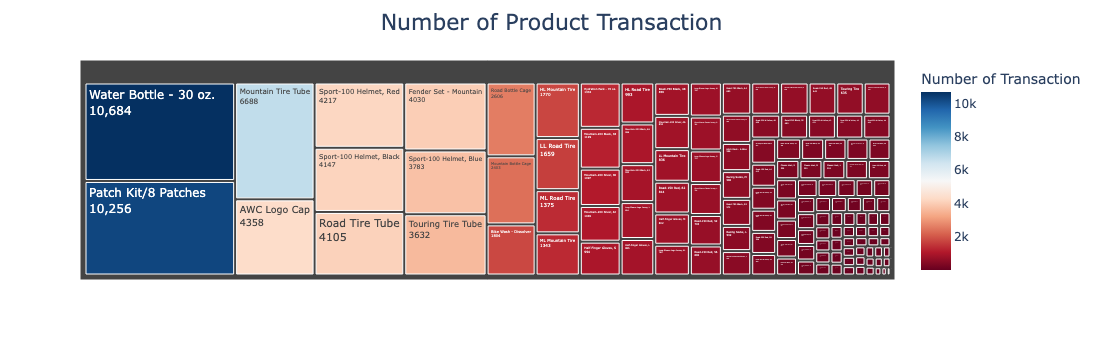

In [ ]:
ProductTrCount = df.groupby(pd.Grouper(key='Product')).size().reset_index(name='Number of Transaction')
fig = px.treemap(ProductTrCount, path=['Product'], values='Number of Transaction', color='Number of Transaction',color_continuous_scale='RdBu')
fig.update_layout(title_text='Number of Product Transaction ',
                  title_x=0.5, title_font=dict(size=22)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# BA8: Water Bottle were the most popular products of all in all respective countries. so this product should always kept in stock in a proper quantity.

<Figure size 1500x500 with 0 Axes>

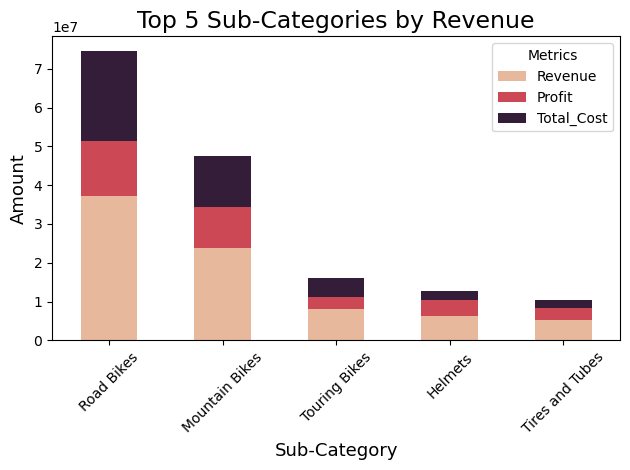

In [ ]:
Top = df.groupby("Sub_Category")[['Revenue', 'Profit', 'Total_Cost']].sum().sort_values("Revenue", ascending=False).head(5)
Top.reset_index(inplace=True)


plt.figure(figsize=(15, 5))
Top_subcat.plot(x='Sub_Category', kind='bar', stacked=True, color=['#E8B89C', '#CB4854', '#331D38'])
plt.title("Top 5 Sub-Categories by Revenue", fontsize=17)
plt.xlabel("Sub-Category", fontsize=13)
plt.ylabel("Amount", fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

3 Sub category for Bikes: Road Bikes, Mountain Bikes and Touring Bikes- provide the most revenue.

<Figure size 1500x500 with 0 Axes>

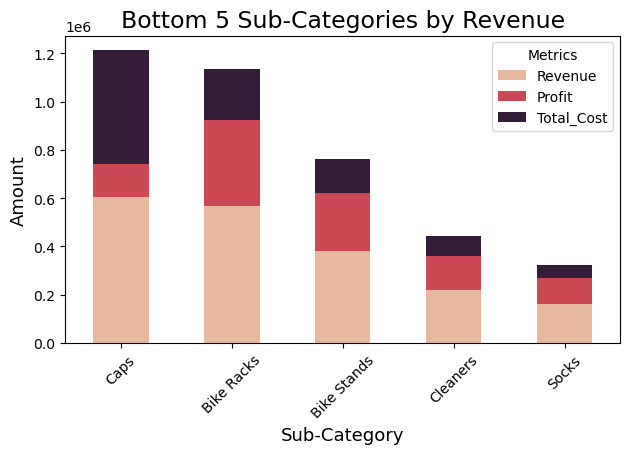

In [ ]:
Bot= df.groupby("Sub_Category")[['Revenue', 'Profit', 'Total_Cost']].sum().sort_values("Revenue", ascending=False).tail(5)

Bot.reset_index(inplace=True)

plt.figure(figsize=(15, 5))
Bot.plot(x='Sub_Category', kind='bar', stacked=True, color=['#E8B89C', '#CB4854', '#331D38'])
plt.title("Bottom 5 Sub-Categories by Revenue", fontsize=17)
plt.xlabel("Sub-Category", fontsize=13)
plt.ylabel("Amount", fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


3 Sub category for Accesories: Bikes Racks, Bike Stands and Cleaners- provide the most least revenue.

# BQ3 : Regarding the above marketing camgpains (Question 2), for which customer segement and for which country our campaign should be run?

<Figure size 1500x500 with 0 Axes>

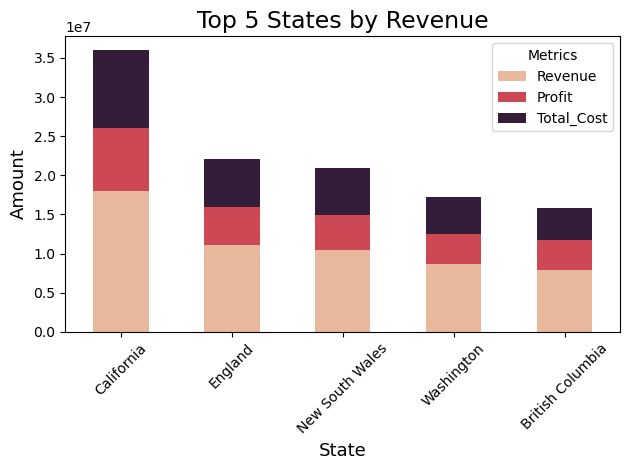

In [ ]:

Top_s = df.groupby("State")[['Revenue', 'Profit', 'Total_Cost']].sum().sort_values("Revenue", ascending=False).head(5)

Top_s.reset_index(inplace=True)
plt.figure(figsize=(15, 5))
Top_s.plot(x='State', kind='bar', stacked=True, color=['#E8B89C', '#CB4854', '#331D38'])
plt.title("Top 5 States by Revenue", fontsize=17)
plt.xlabel("State", fontsize=13)
plt.ylabel("Amount", fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


California from United States provide the most revenue

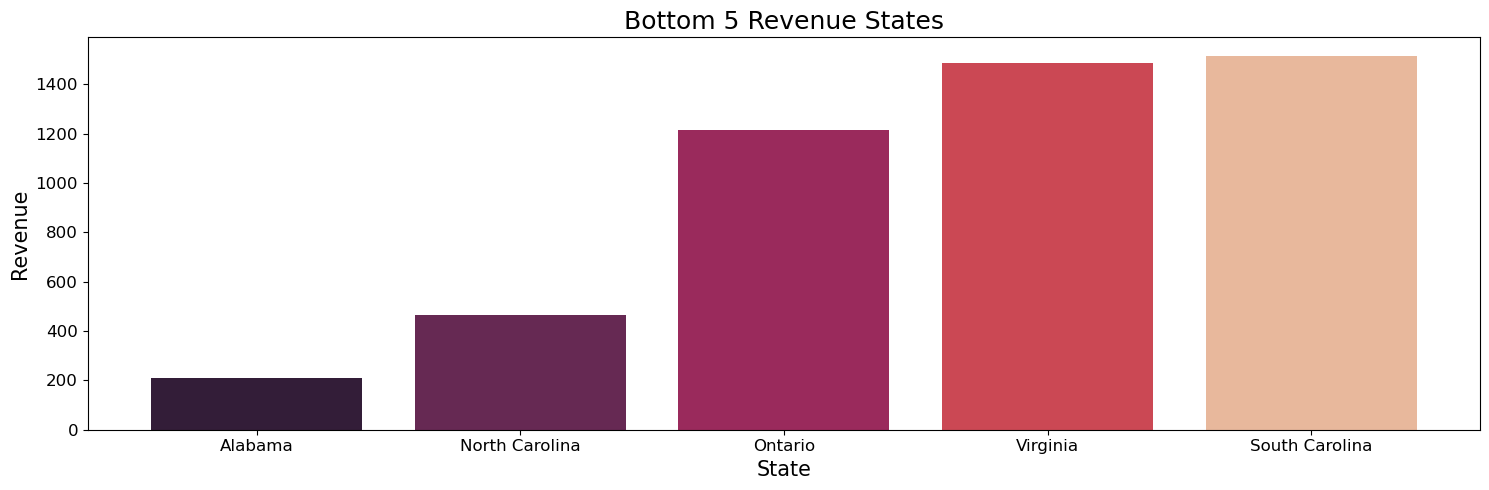

In [ ]:
Bot_state = df.groupby(["State"])[['Revenue']].sum().sort_values("Revenue", ascending=True).head(5)
Bot_state.reset_index(inplace=True)

plt.figure(figsize=(15, 5))
plt.title("Bottom 5 Revenue States", fontsize=18)
plt.bar(Bot_state["State"], Bot_state["Revenue"], color=['#331D38', '#662953', '#9A2A5C', '#CB4854', '#E8B89C'], linewidth=1)
plt.xlabel("State", fontsize=15)
plt.ylabel("Revenue", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

4 states from United States: South California, Virgnia, North Carolina and Alabama- also provide the most least revenue

# BA3: Since united states generates the most values regarding the transaction amount for our company, we shall go to US market with focusing on ALABAMA state following by Nooth carolina state, since they have the least demand among the states.

# Rather than united states, if we target other countries, we should consider Canada following by US following by France.

# BQ5 :Which countries are contributing the most and least to our revenue?

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'United Kingdom')])

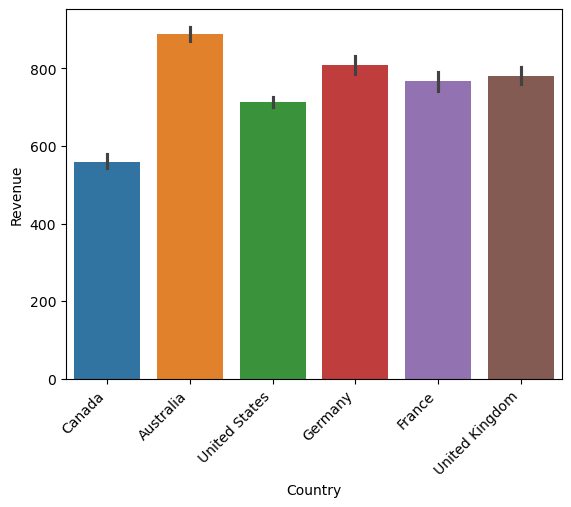

In [ ]:
sns.barplot(data=df,x='Country',y='Revenue',hue='Country')
plt.xticks(rotation=45, ha='right')

# BA5: First is australia and then is Germany. but these are regarding the Revenue. regarding the number of transactions, US comes to first. it is mainly because, the US people buy cheaper group of products

# Conclusion




**Data quality**
1. The Data was not quite clean, the data was not well recorded since there are missing data in August to December for 2014 and 2016.
2. "Almost" the same number of transactions between 2011 and 2012, 2013 and 20155, 2014 and 2016 seems weird and not quite right.
3. Slaes data will be more valuable if only there are customer identificator for each transaction so that the data can be used for further analysis, such as RFM segmentation.

**Key Points from EDA**
1. The most selling and crowded Country is United States
2. Most of the customers are either Adult or Young Adults
3. Bikes provided the most revenue of the company.
4. Since accesories and clothing data was recorded in 2013 we can assume that both of them are new products that started in 2013
5. Accesories provided the most number of transaction, since it might be due to the price since accesories is the cheapest for all product category.
6. Summer(June) and winter(Dec) holiday are when the most transaction occured.

**Solutions**
1. The company need focused more on Adults Age group of customers since they are where the revenues come from. Giving them such promotion might help to boost the revenue and profit for the company. Promotions can also be used to boost sales of clothing and accessories. "Bike sales package" along with accessories and clothes.
2. Australia is the second most selling country. But there are declining revenue value to 2015 and 2016. The company need considering this since the promising value of Australia. Company can do such campaigns to open more store or promotion to Australia citizen.
